<h1>SVM과 인공신경망</h1>

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# SVM

이진화된 당뇨 데이터 셋

In [2]:
from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)

# y 정의
# y_numeric 이 140 이상이면 Pos 
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

다항 커널을 이용한 SVM



In [3]:
from sklearn.svm import SVC
# 파라미터 튜닝 전
f = SVC(C=5, kernel='poly', degree=3)
f.fit(xtrain,ytrain)

SVC(C=5, kernel='poly')

In [4]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.8452830188679246 0.7570621468926554


RBF를 이용한 SVM

In [8]:
# parameter tuning
# 주로 c를 변환
params = 10**np.linspace(-5,5,num=31)
acc_train = []; acc_cv = []; acc_test = []

# c를 변환
for c in params:
    # rbf 커널 사용
    f = SVC(C=c,kernel='rbf',gamma='auto',random_state=0)
    # 모델 훈련
    f.fit(xtrain,ytrain)
    acc_train.append( f.score(xtrain,ytrain) )
    acc_cv.append( cross_val_score(f,xtrain,ytrain,cv=5).mean() )
    acc_test.append( f.score(xtest,ytest) )

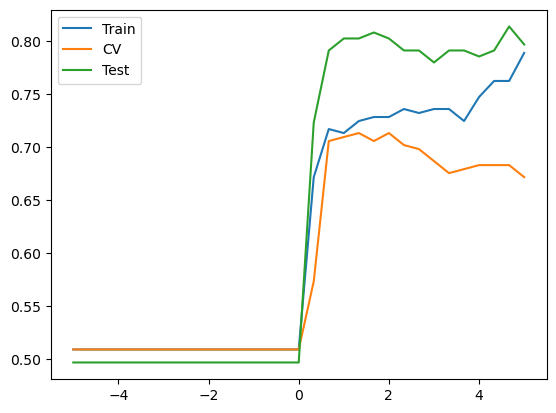

In [9]:
idx = np.log10(params)
plt.plot(idx,acc_train,idx,acc_cv,idx,acc_test)
plt.legend(['Train','CV','Test'])

In [10]:
# 그리드서치로 최적의 c파라미터 찾기

from sklearn.model_selection import GridSearchCV
params = {'C': 10**np.linspace(-1,5,21),}
f = GridSearchCV( SVC(kernel='rbf',gamma='auto'), params )
f.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(gamma='auto'),
             param_grid={'C': array([1.00000000e-01, 1.99526231e-01, 3.98107171e-01, 7.94328235e-01,
       1.58489319e+00, 3.16227766e+00, 6.30957344e+00, 1.25892541e+01,
       2.51188643e+01, 5.01187234e+01, 1.00000000e+02, 1.99526231e+02,
       3.98107171e+02, 7.94328235e+02, 1.58489319e+03, 3.16227766e+03,
       6.30957344e+03, 1.25892541e+04, 2.51188643e+04, 5.01187234e+04,
       1.00000000e+05])})

In [11]:
# 가장 좋은 파라미터 c의 값은?

f.best_params_

{'C': 12.589254117941675}

In [12]:
# 그 때 모델의 성능은?
# 파라미터 튜닝을 통해 얻은 모델이 더 향상된 점수를 보임

print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.720754716981132 0.8022598870056498


# 인공신경망

이진화된 당뇨 데이터 셋

In [13]:
# 인공신경망 (분류 모델, 이진 분류)

from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)
y = [ 'Neg' if y_numeric[i]<140 else 'Pos' for i in range(len(y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

인공신경망 (분류 모델, 이진분류)

In [15]:
# MLPClassifier는 조절해줘야할 파라미터가 많음


from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (2,2), # 히든 레이어 크기 (2, 2)
        activation = 'logistic', # 활성화 함수: 로지스틱
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        # alpha: 
        alpha = 0.001, # L2 regularization 
        batch_size = 'auto',
        learning_rate = 'constant', # 0.001
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)

In [16]:
f.fit(xtrain,ytrain)

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(2, 2),
              max_iter=10000, random_state=0, solver='lbfgs')

In [17]:
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

# 점수가 낮음
# 거의 훈련이 되지 않았다는 것을 의미
# 파라미터를 수정하며 모델을 개선해나가야함

0.5094339622641509 0.4971751412429379


In [18]:
# 어떤 상수를 사용했나?
# 첫 번재 array: 총 20개의 w 사용 (20개의 경우의 수)
# 두 번째 array: (2*2) 총 4개의 경우
# 세 번째 array: 2개


f.coefs_

[array([[ 0.03984343,  0.17565562],
        [ 0.0839064 ,  0.03665243],
        [-0.06237327,  0.11898215],
        [-0.05098735,  0.31977102],
        [ 0.37856232, -0.09520096],
        [ 0.23818025,  0.02356312],
        [ 0.05558444,  0.347595  ],
        [-0.35026679, -0.33719646],
        [-0.39176645,  0.2714562 ],
        [ 0.22708623,  0.30202552]]),
 array([[-0.05313496,  0.39157514],
        [-0.53840243,  0.19298804]]),
 array([[0.13086647],
        [0.09060609]])]

In [19]:
# intercepts까지 총 31개의 파라미터
# 20+4+2 + 2+2+1

f.intercepts_

[array([0.38992741, 0.24352371]),
 array([-0.50195794,  0.6201843 ]),
 array([-0.06750068])]

In [22]:
# 위에서 히든 레이어 2*2 는 성능이 낮았음

from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        # 히든 레이어 크기 늘리기
        hidden_layer_sizes = (10,5),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        # regularization 높이기
        alpha = 0.01, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)


In [25]:
# 모델 재훈련
f.fit(xtrain,ytrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(10, 5),
              max_iter=10000, random_state=0, solver='lbfgs')

In [26]:
# train set에서는 거의 맞춤 (오버피팅)
# test set에서는 향상 되었지만 아직 부족

print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9924528301886792 0.6045197740112994


인공신경망 (다중 분류)

In [21]:
# 데이터를 바꿔서 
# 아까는 y_numerinc을 이진분류했다면, 이번엔 다중분류

from sklearn.datasets import load_diabetes
X, y_numeric = load_diabetes(return_X_y=True,as_frame=True)

# y_numeric을 다중분류
y = pd.cut(y_numeric,bins=3,labels=[1,2,3])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.4,random_state=42)

In [27]:
# 히든 레이어 2*2

from sklearn.neural_network import MLPClassifier
f = MLPClassifier(
        hidden_layer_sizes = (2,2),
        activation = 'logistic',
        solver = 'lbfgs', # for small data set, sgd/adam for large data set
        alpha = 0.001, # L2 regularization
        batch_size = 'auto',
        learning_rate = 'constant',
        learning_rate_init = 0.001,
        random_state = 0,
        max_iter = 10000)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.6867924528301886 0.6271186440677966


In [28]:
# array 1: 10개
# array 2: 히든 레이어 2*2 총 4
# output layer: 2*3 총 6개 파라미터 존재

f.coefs_

[array([[-14.06890682, -14.91141599],
        [  0.89095701, -11.17126073],
        [ -0.59371161,  11.93242372],
        [ -3.67351494,  15.65394075],
        [ 10.47082531,  -9.03970694],
        [-11.00439458,  -5.36270066],
        [ 15.34473456,   7.37385618],
        [ -0.53837993,  10.11612359],
        [ 14.13918352,  23.98356241],
        [-24.14265757, -23.31589754]]),
 array([[ 38.45817474,  11.440564  ],
        [-11.21269814, -32.17508511]]),
 array([[  7.69063831,   7.17680815, -14.93540445],
        [  8.5689248 ,  -0.4534377 ,  -8.04755552]])]

# 연습 문제

아래와 같이 MNIST 데이터 셋을 읽고 다음의 질문에 답하시오. MNIST 데이터 셋은 아래와 같이 읽도록 한다.
1. MNIST 데이터 셋의 샘플의 수는 몇 개인가? 총 변수의 수는 몇 개인가? 클래스의 수는 몇 개인가?
2. MNIST 데이터의 훈련 데이터를 이용하여 SVM 모델을 훈련하고, 평가 데이터에서 성능을 측정하시오.
3. MNIST 데이터의 훈련 데이터를 이용하여 인공신경망 모델을 훈련하고, 평가 데이터에서 성능을 측정하시오.

In [43]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=1)

In [44]:
X.shape, y.shape

((1797, 64), (1797,))

In [45]:
xtrain.shape, ytrain.shape

((1203, 64), (1203,))

In [ ]:
shape

In [48]:
y == 0

array([ True, False, False, ..., False, False, False])

In [51]:
y[y==0].shape

(178,)

In [47]:
sum(y == 0)

178

In [ ]:
X == 0

In [37]:
import tensorflow as tf

# MNIST 데이터셋 로드
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 레이블이 0인 표본의 수 계산
count_train = sum(train_labels == 0)
count_test = sum(test_labels == 0)
total_count = count_train + count_test

total_countb

11490434/11490434 [==============================] - 3s 0us/step


6903

In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# load_digits 데이터셋 로드
X, y = load_digits(return_X_y=True)

# 훈련 및 테스트 데이터 분할
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# 레이블이 0인 표본의 수 계산
count_zero_total = sum(y == 0)
count_zero_train = sum(ytrain == 0)
count_zero_test = sum(ytest == 0)



In [41]:
count_zero_test

63